# Segmentación de productos

In [1]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

plt.rcParams['figure.figsize'] = [12, 8]

import warnings
warnings.filterwarnings('ignore')

In [2]:
path=r"C:\Users\Desarrollador XPD\Documents\Anaconda\portafolios\ecommerce"
df= pd.read_csv(path+"\\datos.csv")
 
df.head()

,fecha,producto,cantidad,ganancia
0,30/06/13,"Touring-1000 Yellow, 60",140,-73963.39
1,30/04/12,"Mountain-100 Black, 38",70,-73804.28
2,30/04/12,"Mountain-100 Silver, 38",65,-69040.20
3,30/04/12,"Mountain-100 Black, 48",61,-64315.16
4,30/04/12,"Mountain-100 Black, 42",60,-63260.81


In [3]:
prod_data = df.groupby('producto').agg({'cantidad': sum, 'ganancia': sum}) 
prod_data.head(10)


,cantidad,ganancia
producto,,
AWC Logo Cap,8311,-4767.56
All-Purpose Bike Stand,249,24783.47
Bike Wash - Dissolver,3319,9179.56
Cable Lock,1087,5076.27
Chain,774,2439.03
"Classic Vest, L",207,7942.53
"Classic Vest, M",2284,37717.52
"Classic Vest, S",4247,63220.74
Fender Set - Mountain,2121,29184.79


In [4]:
from sklearn import preprocessing

min_max_scaler=preprocessing.MinMaxScaler().fit_transform(prod_data)
df_escalado= pd.DataFrame(min_max_scaler)
df_escalado=df_escalado.rename(columns={0:"cantidad",1:"ganancia"})
df_escalado.head()

,cantidad,ganancia
0,1.000000,0.138019
1,0.029493,0.173194
2,0.399061,0.154620
3,0.130372,0.149736
4,0.092693,0.146597


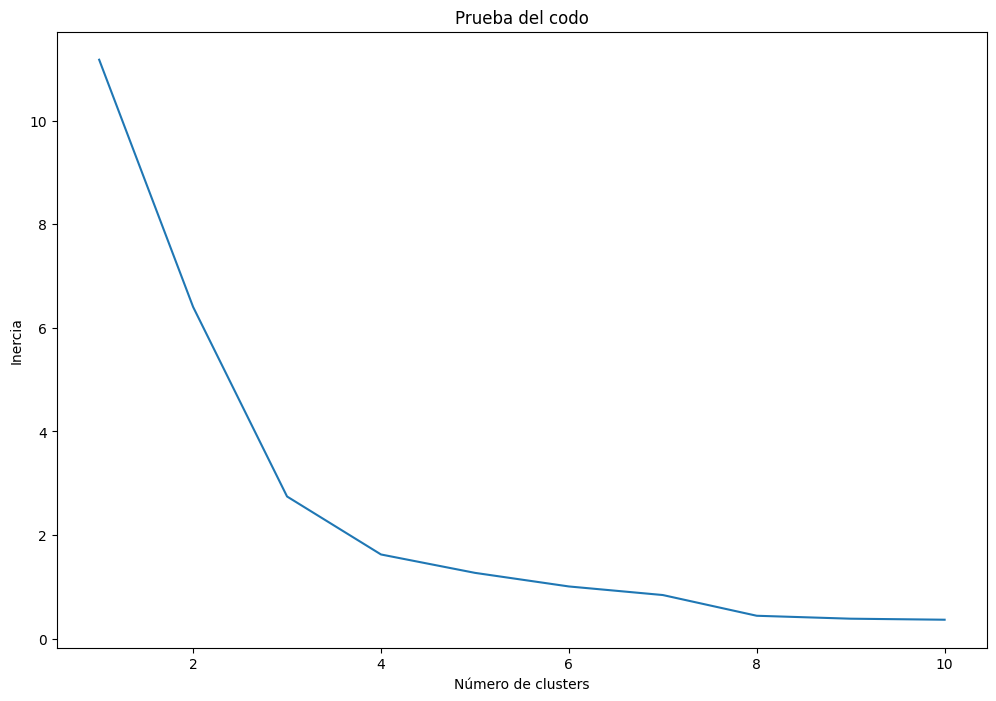

In [5]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_escalado)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias)
plt.title('Prueba del codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

El gráfico de codo indica que la inercia disminuye rápidamente hasta 3 clusters, donde la reducción se vuelve más gradual. Este punto sugiere que **3 es la mejor opción** para equilibrar precisión y simplicidad, evitando la sobrecomplicación del modelo.

In [6]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_escalado)
centroids=kmeans.cluster_centers_


In [7]:
encoder = LabelEncoder()
labels = encoder.fit_transform(kmeans.labels_)
category_map = {0: 'A', 1: 'B', 2: 'C'}
df_escalado['category'] = [category_map[label] for label in labels]

# Transformar categorías en variables numéricas para calcular el coeficiente de silueta
encoder = LabelEncoder()
labels_transformed = encoder.fit_transform(df_escalado['category'])

In [8]:
silhouette_avg = silhouette_score(df_escalado.drop('category', axis=1), labels_transformed)
print("El coeficiente de silueta es:", silhouette_avg)

El coeficiente de silueta es: 0.7466752020029499


In [9]:
df_escalado = df_escalado.drop('category', axis=1)


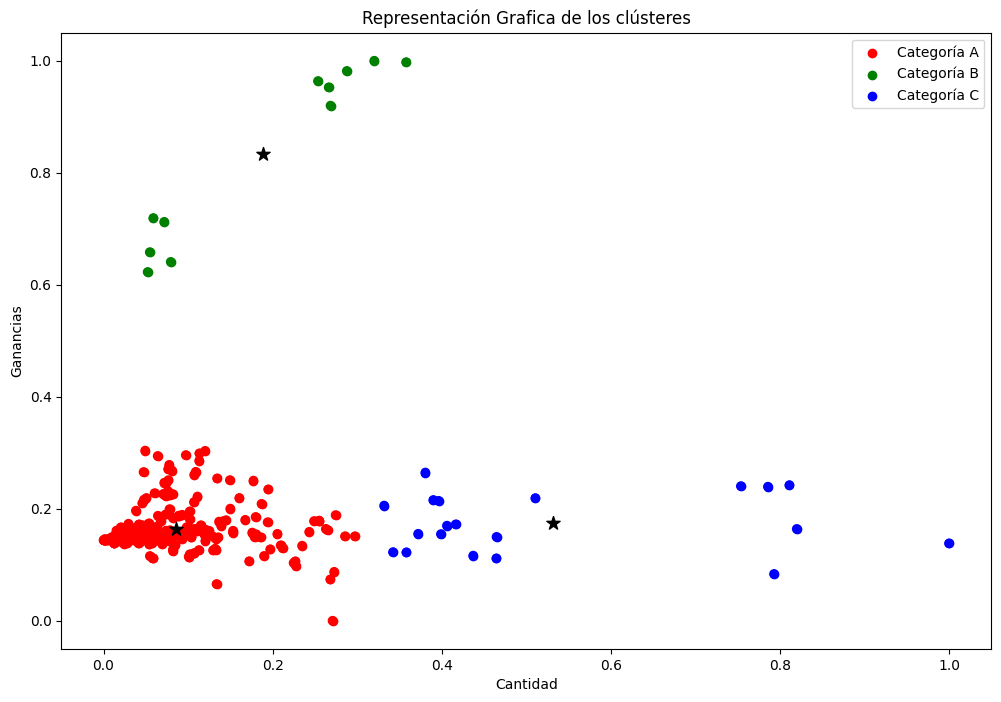

In [10]:
x=df_escalado["cantidad"].values
y=df_escalado["ganancia"].values

#Etiquetar datos
labels=kmeans.predict(df_escalado)

#Explorando grafica de resultados

colors = ['red', 'green', 'blue']
asignar=[]

#Mustra los centroides
for i in range(n_clusters):
    plt.scatter(df_escalado.loc[labels==i, 'cantidad'], df_escalado.loc[labels==i, 'ganancia'], c=colors[i], label='Categoría '+category_map[i])

#agregar las etiquetas
for row in labels:
    asignar.append(colors[row])

plt.scatter(x, y,c= asignar)
plt.scatter(centroids[:,0],centroids[:,1],marker="*", c="black",s=100) #Marcar Centroides
plt.legend()
 
    
plt.xlabel("Cantidad")
plt.ylabel("Ganancias")
plt.title("Representación Grafica de los clústeres")
plt.show()

El gráfico muestra que los productos de la Categoría B generan las mayores ganancias con cantidades intermedias, lo que indica una excelente eficiencia comercial. La Categoría A, aunque tiene altos volúmenes, produce ganancias más bajas, sugiriendo márgenes reducidos. En cambio, la Categoría C presenta tanto bajas cantidades como ganancias, siendo la menos rentable del conjunto.